### TITLE: MoneyMentor (PERSONAL FINANCE ADVISOR MODEL)

#### Problem Description: 
 Many people often struggle with their finances due to a combination of factors. This may include:
 - Lack of financial literacy and the emotional aspects that influence spending and investment decisions.
 - Societal pressures and the difficulty of sticking to a budget or even creating one.This often leads to living beyond one's means and accumulating insufficient savings.
 - Poor debt management and the impact of unexpected life events
 - Underlying psychological factors and past experiences, which also play a role in shaping financial behaviors and outcomes. 
 

#### Objective:

This model is important because it empowers individuals to manage their money more effectively by providing more personalized, accessible, and automated financial guidance. Many people lack financial literacy or access to professional advice which leads to poor budgeting, saving, or debt management. This model can analyze a user’s income, expenses, and financial habits to offer tailored recommendations, encouraging better financial habits  and promoting long-term stability. By making financial planning more inclusive and affordable, such a model can help reduce debt, improve savings, and support overall financial well-being.

#### Expected Outcome:
- To build a financial system that automatically labels financial transactions,tracks spending habits and groups users based on their habits.
- Provides actionable suggestions to help users manage their money more effectively. 
- It will also involve automatic savings adjustment(updates how much to save based on real time patterns,goals or obligations)
- Real time nudges like, "You're close to overspending this week"

#### Data loading and Exploration

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Load csv file
df= pd.read_csv('Finances data.csv')

In [ ]:
# Checks shape of Df (No. of rows & columns)
df.shape

(20000, 27)

In [ ]:
# Overview of Df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [ ]:
# Checks first 5 rows
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [ ]:
# Checks last 5 rows
df.tail()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
19995,40913.466178,51,4,Self_Employed,Tier_1,12274.039853,7703.854895,1646.799940,5477.403246,2084.230191,...,1163.318310,1163.318310,597.028412,287.315050,347.658355,145.843671,212.833325,44.900294,98.765527,190.591917
19996,90295.772638,21,1,Student,Tier_2,18059.154528,0.000000,2770.589626,13118.222419,4633.108332,...,10613.589598,30725.175170,3854.823822,359.602765,911.269461,424.064224,1555.548024,129.655981,239.445622,351.436046
19997,40604.567373,30,1,Professional,Tier_2,8120.913475,8089.612716,1548.564328,6018.276121,2493.563674,...,2267.905134,2267.905134,1385.511100,379.927216,138.209465,297.695658,824.565267,57.891000,72.728663,122.569277
19998,118157.817240,27,2,Professional,Tier_1,35447.345172,12345.910538,4735.672471,16392.438426,8248.242279,...,10603.684814,10603.684814,3217.771594,2265.865033,726.247719,273.912367,859.230004,98.961780,92.189012,569.811212
19999,8209.249769,62,3,Professional,Tier_1,2462.774931,1120.881704,276.376556,969.916908,460.435438,...,531.044006,860.350559,261.160294,124.057428,25.940556,35.238134,94.909265,1.685026,4.837574,12.766302


In [9]:
# Summary statistics for numerical columns
df.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,4982.878416,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,7733.468188,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.000000,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973
25%,1.760488e+04,29.000000,1.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,581.632906,...,1224.932636,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,1020.198376,...,2155.356763,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257
75%,5.176545e+04,53.000000,3.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104082,...,6216.309609,13331.950716,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981
max,1.079728e+06,64.000000,4.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,38667.368308,...,245504.485208,377060.218482,34894.644404,12273.258242,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137


#### Checking for missing values

In [ ]:
# Check for sum of missing values
df.isnull().sum()

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
d

In [ ]:
# Check for Duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Checks Df columns
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')

#### Exploratory Data Analysis

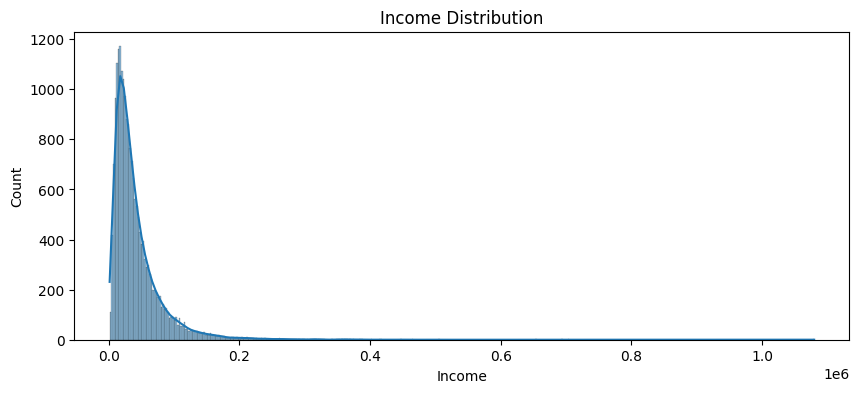

In [13]:
# Plot income distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution')
plt.show()

- The histogram shows a highly skewed income distribution, where the majority of the population earns very low incomes, while a small fraction earns significantly higher incomes. This indicates substantial income inequality, with most people clustered at the lower end of the income scale and a long tail representing a few high earners.

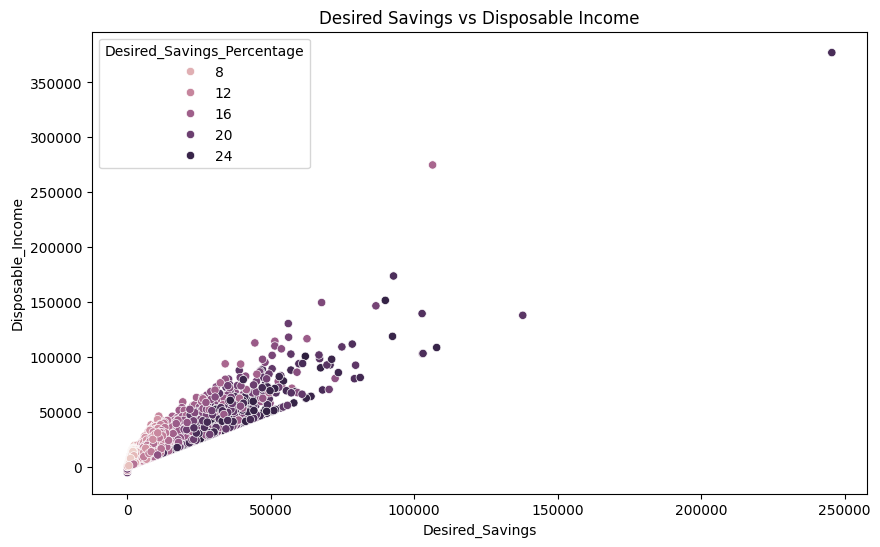

In [14]:
# Plot desired savings vs actual disposable income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Desired_Savings', y='Disposable_Income', hue='Desired_Savings_Percentage')
plt.title('Desired Savings vs Disposable Income')
plt.show()

- The plot suggests that as people earn more, they generally aim to save more. However, the desired savings percentage varies, indicating that saving behavior is influenced by factors beyond income, such as financial goals, expenses, or personal preferences.
This visualization is useful for understanding saving trends across different income levels and can inform financial planning or policy-making.

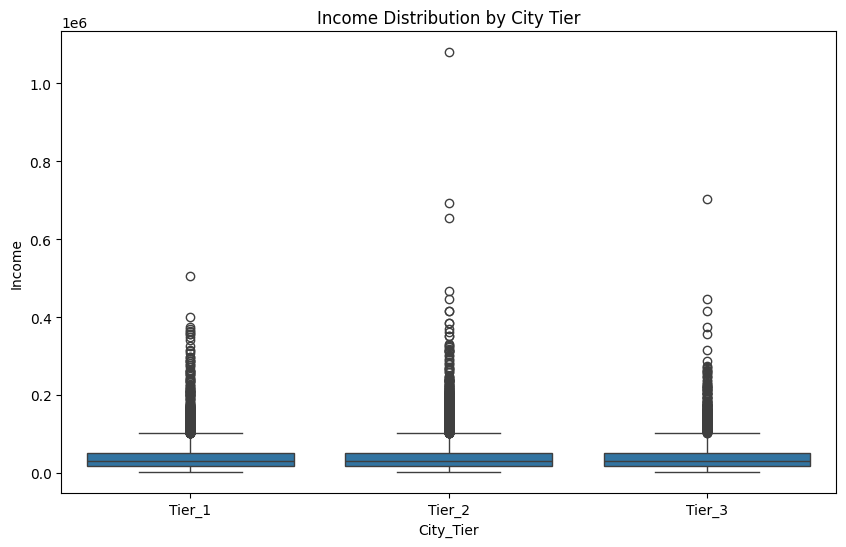

In [15]:
# Boxplots by city tier (if relevant)
plt.figure(figsize=(10, 6))
sns.boxplot(x='City_Tier', y='Income', data=df)
plt.title('Income Distribution by City Tier')
plt.show()

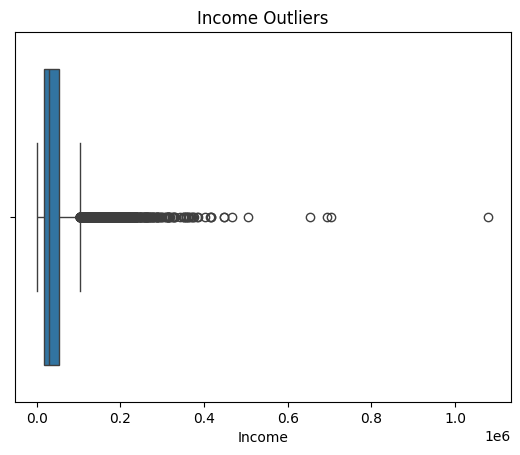

In [16]:
# Boxplot to check outliers
sns.boxplot(x=df['Income'])
plt.title('Income Outliers')
plt.show()

In [17]:
# Different expense categories
expense_columns = ['Rent','Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out','Entertainment', 'Utilities', 'Healthcare', 'Education',
'Miscellaneous'] 
# Create a 'Total_Expenses' column by summing the relevant expense columns
df['Total_Expenses'] = df[expense_columns].sum(axis=1)

<Axes: title={'center': 'Average Monthly Spending Breakdown'}>

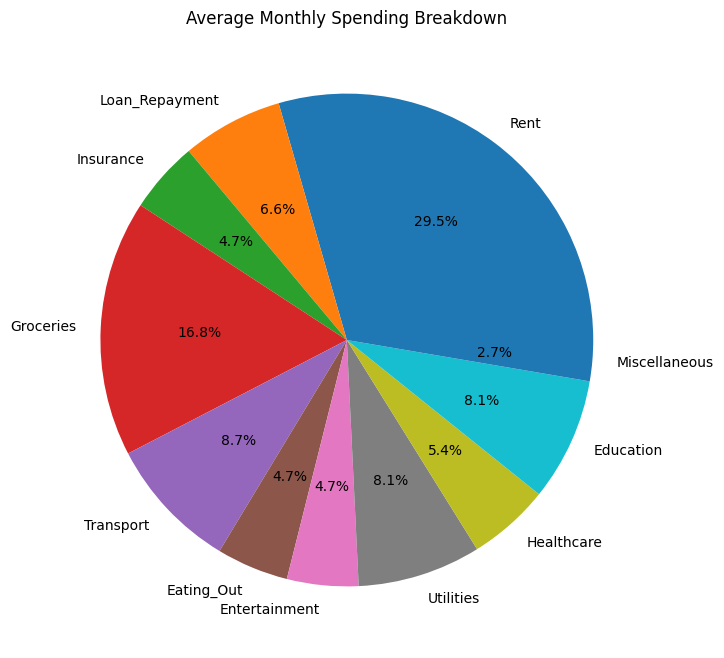

In [18]:
df[expense_columns].mean().plot(kind='pie', autopct='%1.1f%%', title='Average Monthly Spending Breakdown', figsize=(8, 8))

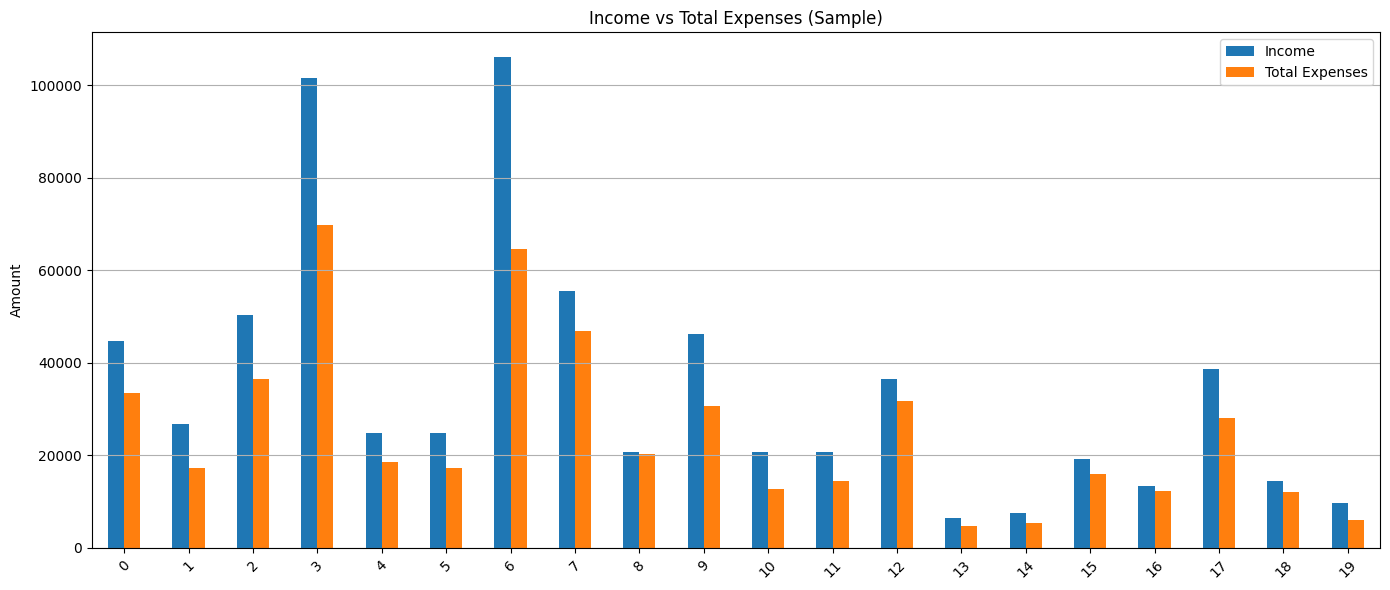

In [19]:
df_sample = df.head(20)  # or use df.sample(20)

df_sample[['Income', 'Total_Expenses']].plot(kind='bar', figsize=(14, 6))
plt.title('Income vs Total Expenses (Sample)')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(["Income", "Total Expenses"])
plt.tight_layout()
plt.show()

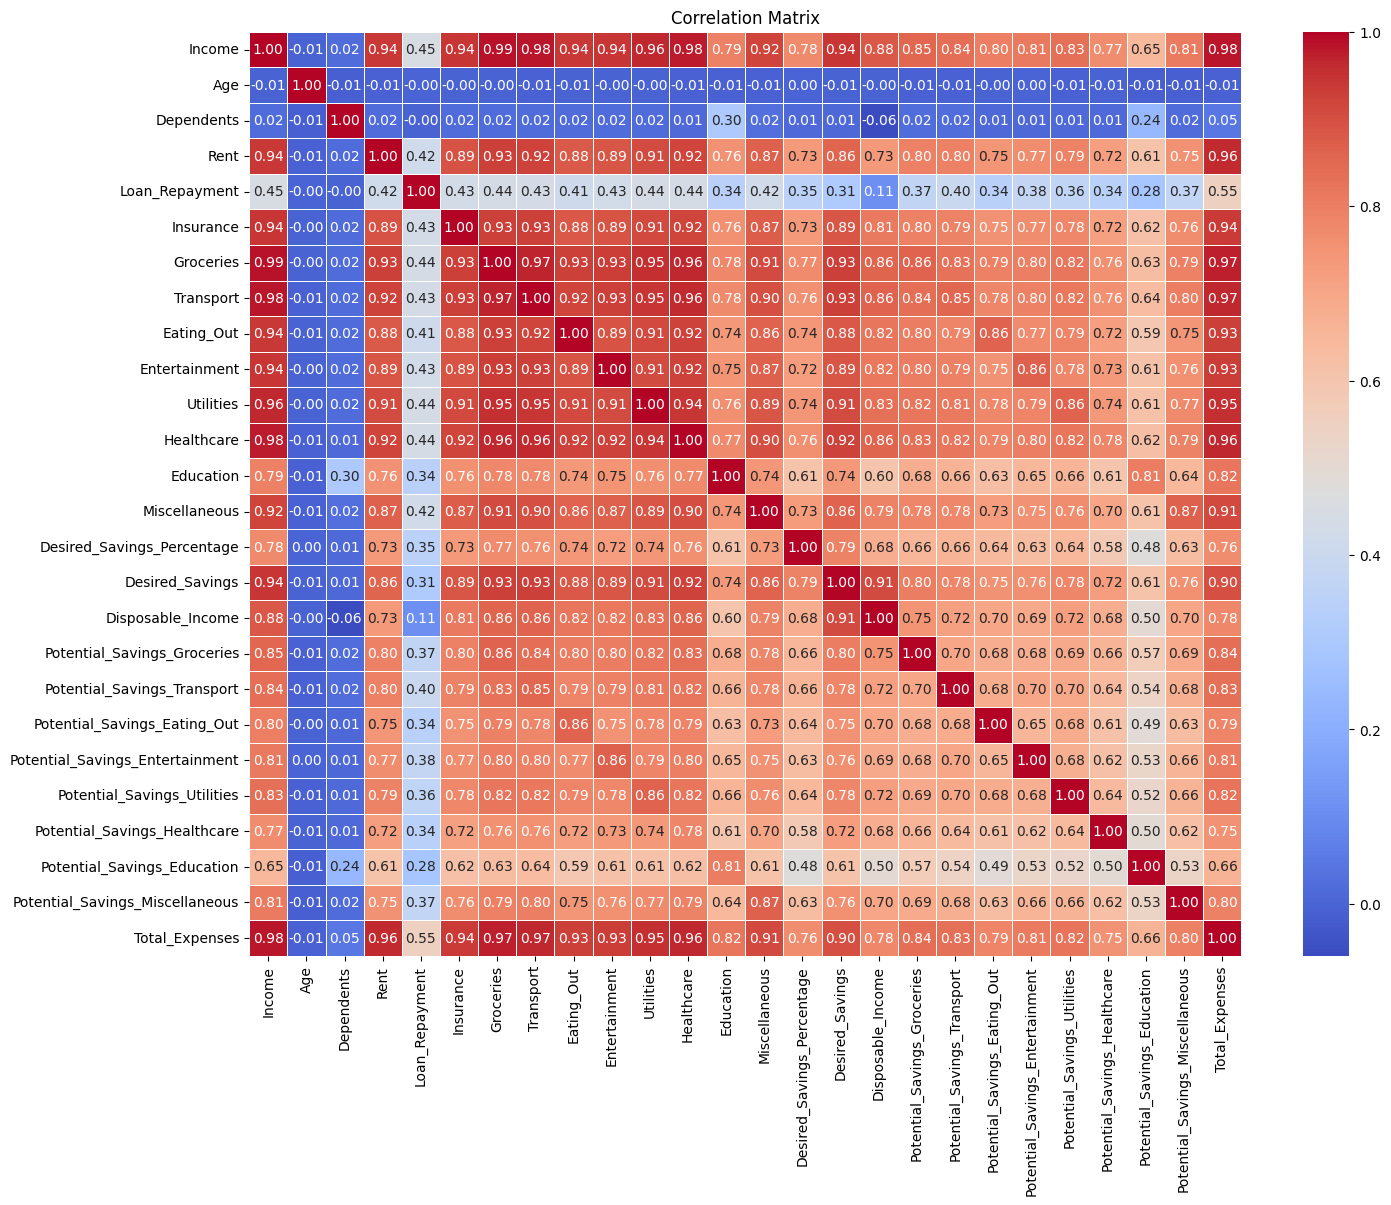

In [20]:
#Filter Numeric Columns
numeric_df = df.select_dtypes(include='number')

#Create a Correlation Matrix
corr_matrix = numeric_df.corr()

#Plot Heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [21]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous', 'Total_Expenses'],
      dtype='object')

#### Data Analysis
- This is where we dig into the data for patterns, trends, and key insights

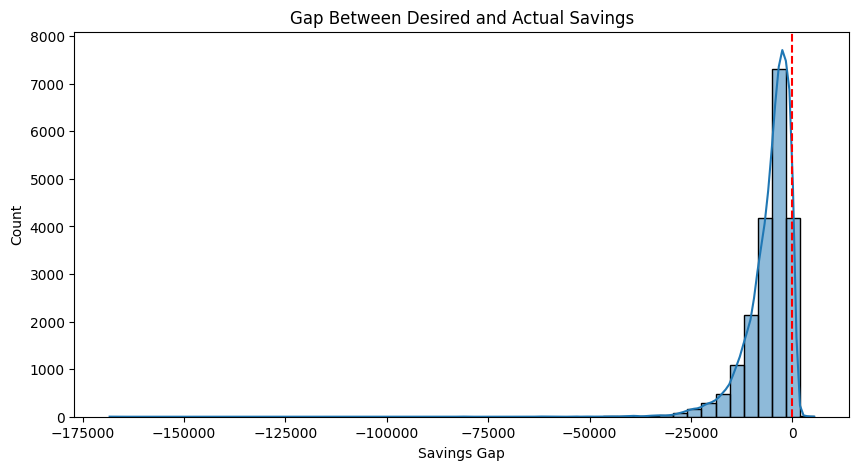

In [22]:
df['Actual_Savings'] = df['Income'] - (
    df['Rent'] + df['Loan_Repayment'] + df['Insurance'] + df['Groceries'] +
    df['Transport'] + df['Eating_Out'] + df['Entertainment'] + df['Utilities'] +
    df['Healthcare'] + df['Education'] + df['Miscellaneous']
)

# Difference between actual and desired
df['Savings_Gap'] = df['Desired_Savings'] - df['Actual_Savings']

plt.figure(figsize=(10, 5))
sns.histplot(df['Savings_Gap'], bins=50, kde=True)
plt.title('Gap Between Desired and Actual Savings')
plt.xlabel('Savings Gap')
plt.axvline(0, color='red', linestyle='--')
plt.show()


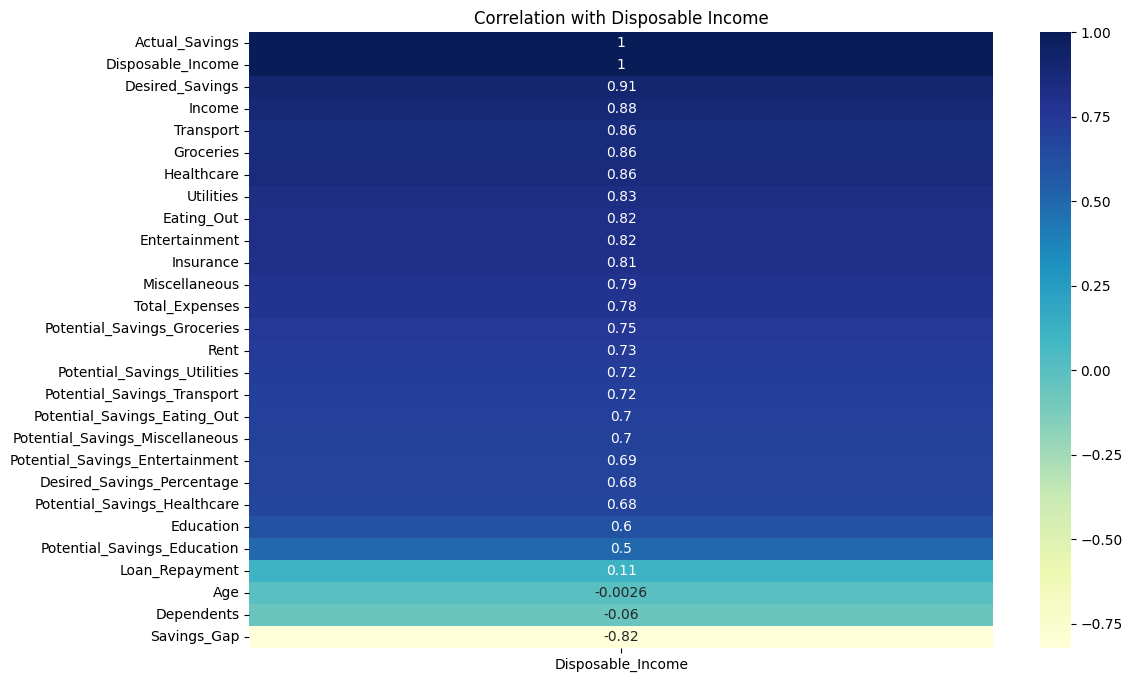

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True)[['Disposable_Income']].sort_values(by='Disposable_Income', ascending=False), 
            annot=True, cmap='YlGnBu')
plt.title('Correlation with Disposable Income')
plt.show()

In [24]:
categories = ['Groceries', 'Transport', 'Eating_Out', 'Entertainment', 
              'Utilities', 'Healthcare', 'Education', 'Miscellaneous']

# Create overspending columns for each
for cat in categories:
    spend_col = cat
    save_col = f'Potential_Savings_{cat}'
    df[f'Overspending_{cat}'] = df[spend_col] - df[save_col]


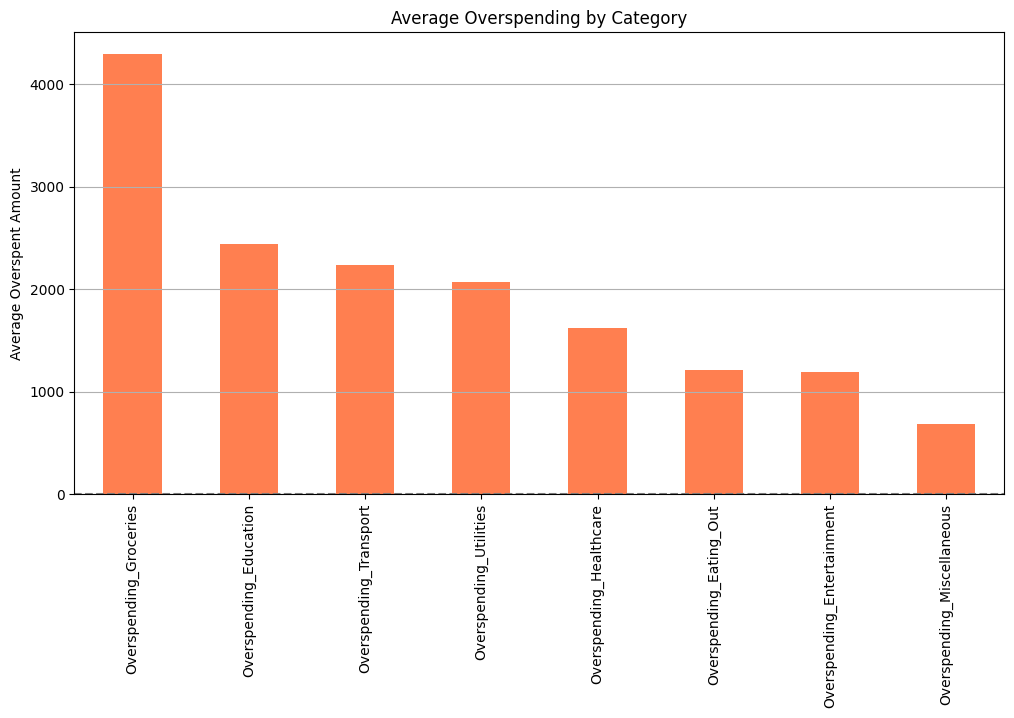

In [25]:
# Calculate average overspending
overspending_cols = [f'Overspending_{cat}' for cat in categories]
avg_overspending = df[overspending_cols].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
avg_overspending.plot(kind='bar', color='coral')
plt.title('Average Overspending by Category')
plt.ylabel('Average Overspent Amount')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(axis='y')
plt.show()


### Feature engineering

1. Categorize Spending & Create Ratios
Target: Automatic labeling, habit tracking for grouping, real-time nudges

In [27]:
# Group essential and discretionary spending
df['Essential_Expenses'] = df['Groceries'] + df['Utilities'] + df['Healthcare'] + df['Education']
df['Discretionary_Expenses'] = df['Eating_Out'] + df['Entertainment'] + df['Miscellaneous'] + df['Transport']

# Ratio features
df['Rent_to_Income'] = df['Rent'] / df['Income']
df['Loan_to_Income'] = df['Loan_Repayment'] / df['Income']
df['Essentials_to_Income'] = df['Essential_Expenses'] / df['Income']
df['Discretionary_to_Income'] = df['Discretionary_Expenses'] / df['Income']

 2. Track Savings & Set Goals
Target: Savings adjustment, user feedback, habit tracking

In [28]:
# Savings-related metrics
df['Savings_Rate'] = df['Actual_Savings'] / df['Income']
df['Savings_vs_Desired'] = df['Actual_Savings'] / (df['Desired_Savings'] + 1e-6)
df['Disposable_Utilization'] = df['Actual_Savings'] / (df['Disposable_Income'] + 1e-6)

In [29]:
# Update savings goal if user is consistently over/under saving
df['Suggested_Savings_Adjustment'] = df['Desired_Savings'] + (df['Savings_vs_Desired'] - 1) * df['Disposable_Income']

3. Overspending Detection
Target: Real-time nudges

In [30]:
df['Total_Overspending'] = (
    df['Overspending_Groceries'] + df['Overspending_Transport'] +
    df['Overspending_Eating_Out'] + df['Overspending_Entertainment'] +
    df['Overspending_Utilities'] + df['Overspending_Healthcare'] +
    df['Overspending_Education'] + df['Overspending_Miscellaneous']
)

df['Overspending_to_Income'] = df['Total_Overspending'] / df['Income']

# Flag if overspending crosses % of income
threshold = df['Total_Overspending'].quantile(0.75)  # top 25% overspending
df['Overspending_Alert'] = df['Total_Overspending'] > threshold

In [31]:
print(df['Overspending_Alert'].value_counts(normalize=True))

Overspending_Alert
False    0.75
True     0.25
Name: proportion, dtype: float64


#### Data Preprocessing

In [ ]:
# Define column groups
numerical_cols = [
    'Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 'Insurance',
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities',
    'Healthcare', 'Education', 'Miscellaneous', 'Desired_Savings_Percentage',
    'Desired_Savings', 'Disposable_Income', 'Total_Expenses', 'Actual_Savings',
    'Savings_Gap', 'Essential_Expenses', 'Discretionary_Expenses',
    'Rent_to_Income', 'Loan_to_Income', 'Essentials_to_Income',
    'Discretionary_to_Income', 'Savings_Rate', 'Savings_vs_Desired',
    'Disposable_Utilization', 'Suggested_Savings_Adjustment',
    'Total_Overspending', 'Overspending_to_Income'
]

categorical_cols = ['Occupation', 'City_Tier']

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


#### Modelling part
Feature selection/refinement

Transaction labeling logic or modeling

Grouping based on spending habits

Nudging logic

Savings adjustment modeling

 ##### 1. Transaction Labeling
- Labeling whether a transaction is "fixed", "essential", "discretionary" or "overspending"

In [35]:
# Columns grouped by type
fixed = ['Rent', 'Loan_Repayment', 'Insurance']
essential = ['Groceries', 'Transport', 'Utilities', 'Healthcare', 'Education']
discretionary = ['Eating_Out', 'Entertainment', 'Miscellaneous']
savings = ['Actual_Savings']

# Combine all transaction columns
all_transactions = fixed + essential + discretionary + savings

# Melt the dataset
df_long = df.melt(id_vars=['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Desired_Savings'],
                  value_vars=all_transactions,
                  var_name='Category', value_name='Amount')

In [36]:
# Map default labels
category_map = {}
for cat in fixed:
    category_map[cat] = 'fixed'
for cat in essential:
    category_map[cat] = 'essential'
for cat in discretionary:
    category_map[cat] = 'discretionary'
for cat in savings:
    category_map[cat] = 'savings'

df_long['Default_Label'] = df_long['Category'].map(category_map)

# Generate corresponding overspending column names
df_long['Overspending_Column'] = 'Overspending_' + df_long['Category']

# Merge in overspending data (only for essential + discretionary)
overspending_cols = ['Overspending_' + c for c in essential + discretionary]
overspending_data = df[['Income'] + overspending_cols]

# Merge into long DataFrame
df_long = df_long.merge(overspending_data, on='Income', how='left')

# Final label logic: overspending or undersaving
def label_row(row):
    col = row['Overspending_Column']
    
    if row['Default_Label'] == 'savings':
        # Check for undersaving
        if row['Amount'] < row['Desired_Savings']:
            return 'undersaving'
        else:
            return 'savings'
    
    elif row['Default_Label'] == 'fixed':
        return 'fixed'
    
    elif col in row and pd.notnull(row[col]):
        if row[col] > 0.3 * row['Income']:
            return 'overspending'
    
    return row['Default_Label']

df_long['Final_Label'] = df_long.apply(label_row, axis=1)


/var/folders/8j/5mcl_1pj4496sjc1njhzfrn80000gp/T/ipykernel_37944/2127947479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_long, x='Final_Label', order=['fixed', 'essential', 'discretionary', 'overspending','savings'], palette='Set2')


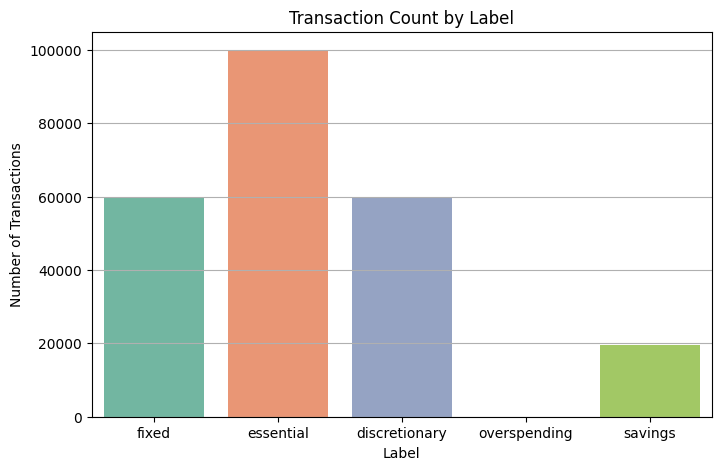

In [37]:
# Count of each label
plt.figure(figsize=(8, 5))
sns.countplot(data=df_long, x='Final_Label', order=['fixed', 'essential', 'discretionary', 'overspending','savings'], palette='Set2')
plt.title('Transaction Count by Label')
plt.xlabel('Label')
plt.ylabel('Number of Transactions')
plt.grid(axis='y')
plt.show()

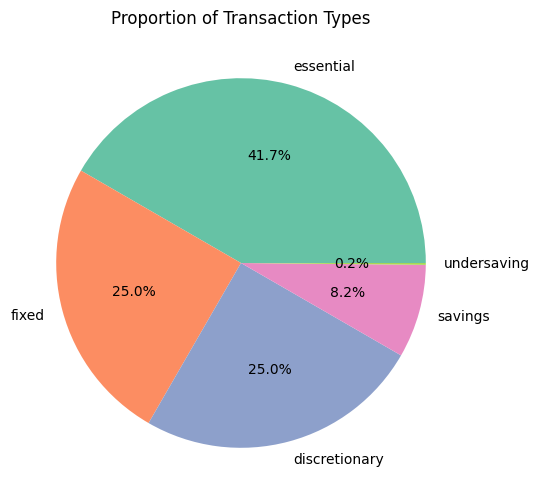

In [38]:
# Pie chart of label proportions
label_counts = df_long['Final_Label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Proportion of Transaction Types')
plt.show()

/var/folders/8j/5mcl_1pj4496sjc1njhzfrn80000gp/T/ipykernel_37944/1142792585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_long, x='Final_Label', y='Amount', estimator='mean', order=['fixed', 'essential', 'discretionary', 'overspending', 'savings'], palette='Set3')


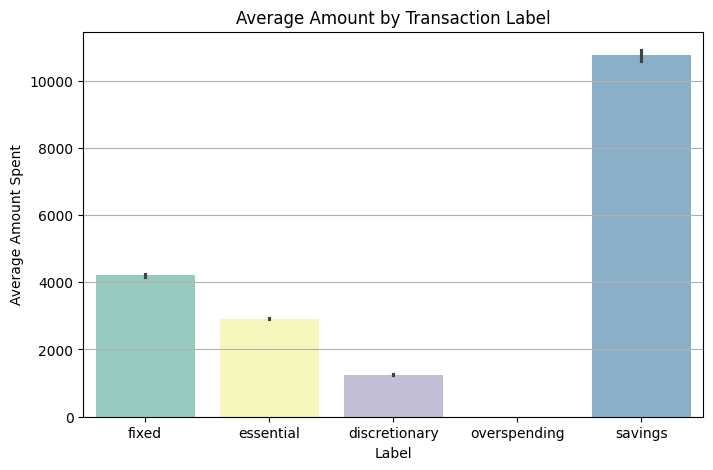

In [39]:
# Average amount spent by label
plt.figure(figsize=(8, 5))
sns.barplot(data=df_long, x='Final_Label', y='Amount', estimator='mean', order=['fixed', 'essential', 'discretionary', 'overspending', 'savings'], palette='Set3')
plt.title('Average Amount by Transaction Label')
plt.xlabel('Label')
plt.ylabel('Average Amount Spent')
plt.grid(axis='y')
plt.show()

#### 📈 2. Spending Habit Tracking

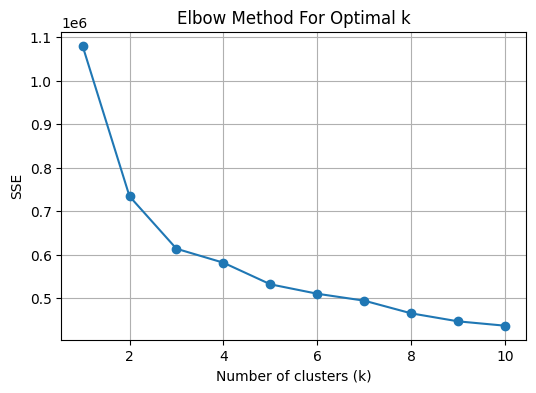

Cluster Financial Profiles:
             Income    Age  Dependents      Rent  Loan_Repayment  Insurance  \
Cluster                                                                      
0         29419.04  41.04        1.98   6476.41         1474.93    1024.06   
1        115461.88  40.98        2.10  25140.37         5540.48    4071.92   

         Groceries  Transport  Eating_Out  Entertainment  ...  Loan_to_Income  \
Cluster                                                   ...                   
0          3682.98    1911.71     1027.98        1022.42  ...            0.05   
1         14451.61    7518.18     4096.42        4038.19  ...            0.05   

         Essentials_to_Income  Discretionary_to_Income  Savings_Rate  \
Cluster                                                                
0                        0.28                     0.15          0.26   
1                        0.29                     0.16          0.25   

         Savings_vs_Desired  Disposable_Util

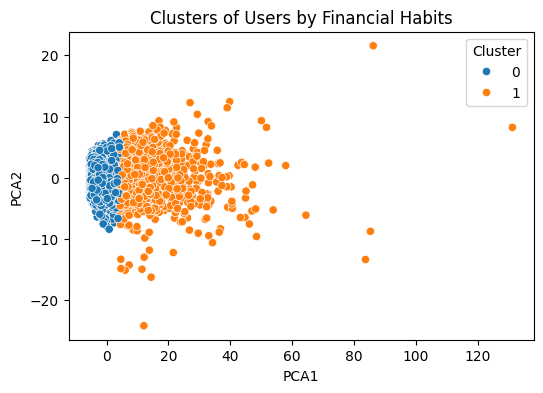

In [ ]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Occupation', 'City_Tier'], drop_first=True)

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# lbow Method to find optimal k
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    sse.append(km.inertia_)

# Plot elbow
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Fit KMeans with optimal k (update after checking the elbow plot)
optimal_k = 2  # Change based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaler.transform(pd.get_dummies(df, columns=['Occupation', 'City_Tier'], drop_first=True)))

# Cluster summary (only on numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns
cluster_summary = df.groupby('Cluster')[numeric_cols].mean().round(2)
print("Cluster Financial Profiles:\n", cluster_summary)


# Visualize clusters with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('Clusters of Users by Financial Habits')
plt.show()


In [41]:
# Calculate silhouette score
sil_score = silhouette_score(scaled_data, df['Cluster'])
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.49


In [42]:
# Iterate through a range of k values (2 to 10) and evaluate the silhouette score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['Cluster'] = kmeans.fit_predict(scaled_data)
    sil_score = silhouette_score(scaled_data, df['Cluster'])
    sil_scores.append(sil_score)
    print(f'k={k}, Silhouette Score: {sil_score:.2f}')

# Find the optimal k (where Silhouette Score is highest)
optimal_k = np.argmax(sil_scores) + 2
print(f'Optimal number of clusters (k): {optimal_k}')


k=2, Silhouette Score: 0.49
k=3, Silhouette Score: 0.34
k=4, Silhouette Score: 0.14
k=5, Silhouette Score: 0.14
k=6, Silhouette Score: 0.11
k=7, Silhouette Score: 0.10
k=8, Silhouette Score: 0.11
k=9, Silhouette Score: 0.12
k=10, Silhouette Score: 0.11
Optimal number of clusters (k): 2


#### 💡 3. Actionable Nudges (e.g., "You’re close to overspending this week")

In [43]:
# Convert 'Overspending_Alert' to boolean if it's not already
df['Overspending_Alert'] = df['Overspending_Alert'].astype(bool)

In [44]:
def generate_nudges(row):
    nudges = []

    # Close to overspending
    if 0.8 < row['Disposable_Utilization'] <= 1.0:
        nudges.append("⚠️ You’re close to overspending your weekly budget.")

    # Already overspending
    if row['Overspending_Alert']:
        nudges.append("❌ You’ve overspent this week. Consider reducing non-essentials.")

    # Not meeting savings goals
    if row['Savings_vs_Desired'] < -0.05:
        nudges.append("💰 You’re below your savings target. Try to reduce spending.")

    # High discretionary spending
    if row['Discretionary_to_Income'] > 0.3:
        nudges.append("🛍️ Discretionary spending is quite high this week.")

    # High rent or loan ratio
    if row['Rent_to_Income'] > 0.4:
        nudges.append("🏠 Rent is consuming a large chunk of your income.")
    if row['Loan_to_Income'] > 0.3:
        nudges.append("📉 Loan payments are high relative to your income.")

    return nudges

In [45]:
# Apply nudges to each row
df['Nudges'] = df.apply(generate_nudges, axis=1)

# Show sample users and their nudges
df[['Income', 'Total_Expenses', 'Savings_Rate', 'Disposable_Utilization', 'Overspending_Alert', 'Nudges']].head(10)

,Income,Total_Expenses,Savings_Rate,Disposable_Utilization,Overspending_Alert,Nudges
0,44637.249636,33371.621929,0.252382,1.0,False,[⚠️ You’re close to overspending your weekly b...
1,26858.596592,17181.777859,0.360288,1.0,False,[⚠️ You’re close to overspending your weekly b...
2,50367.605084,36476.154459,0.275801,1.0,False,[⚠️ You’re close to overspending your weekly b...
3,101455.600247,69837.646632,0.311643,1.0,True,[⚠️ You’re close to overspending your weekly b...
4,24875.283548,18609.583016,0.251885,1.0,False,[⚠️ You’re close to overspending your weekly b...
5,24875.610267,17276.344968,0.305491,1.0,False,[⚠️ You’re close to overspending your weekly b...
6,106119.692762,64524.367039,0.391966,1.0,True,[⚠️ You’re close to overspending your weekly b...
7,55431.341508,46965.396911,0.152728,1.0,True,[⚠️ You’re close to overspending your weekly b...
8,20606.733121,20243.815248,0.017612,1.0,False,[⚠️ You’re close to overspending your weekly b...
9,46304.790235,30614.533959,0.338847,1.0,False,[⚠️ You’re close to overspending your weekly b...


In [46]:
# Flatten to priority (e.g., high/medium/low)
def classify_nudge_priority(nudges):
    if any("❌" in n for n in nudges):
        return "High"
    elif any("⚠️" in n for n in nudges):
        return "Medium"
    elif nudges:
        return "Low"
    return "None"

df['Nudge_Priority'] = df['Nudges'].apply(classify_nudge_priority)

In [47]:
print(df[['Nudges', 'Nudge_Priority']].sample(5).to_string(index=False))

                                                                                                                Nudges Nudge_Priority
[⚠️ You’re close to overspending your weekly budget., ❌ You’ve overspent this week. Consider reducing non-essentials.]           High
                                                                 [⚠️ You’re close to overspending your weekly budget.]         Medium
[⚠️ You’re close to overspending your weekly budget., ❌ You’ve overspent this week. Consider reducing non-essentials.]           High
                                                                 [⚠️ You’re close to overspending your weekly budget.]         Medium
                                                                 [⚠️ You’re close to overspending your weekly budget.]         Medium


#### 💸 4. Savings Adjustment (Regression)

In [48]:
target_col = 'Suggested_Savings_Adjustment'

# Scale to millions target for better numerical stability
df_encoded[target_col] = df[target_col] / 1e6

X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model (Basic RandomForest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate Performance
y_pred = model.predict(X_test)

# Rescale back
y_test_rescaled = y_test * 1e6
y_pred_rescaled = y_pred * 1e6

print("MAE:", mean_absolute_error(y_test_rescaled, y_pred_rescaled))
print("R² Score:", r2_score(y_test_rescaled, y_pred_rescaled))


MAE: 5032859757.989487
R² Score: 0.6858115077328897


Non-numeric columns found: Index(['Overspending_Alert', 'Nudges', 'Nudge_Priority', 'Occupation_Retired',
       'Occupation_Self_Employed', 'Occupation_Student', 'City_Tier_Tier_2',
       'City_Tier_Tier_3'],
      dtype='object')


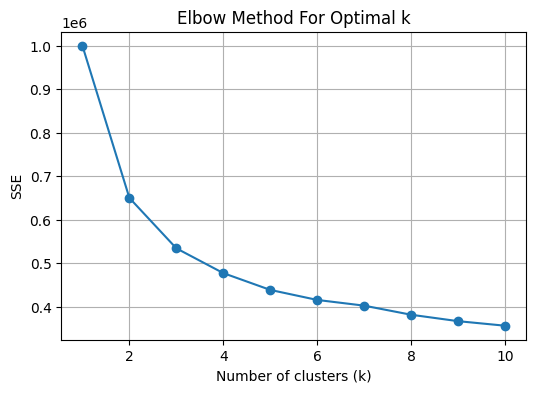

Cluster Financial Profiles:
             Income    Age  Dependents      Rent  Loan_Repayment  Insurance  \
Cluster                                                                      
0         24469.07  41.03        1.98   5391.40         1235.15     851.35   
1        191038.95  40.27        2.20  41246.32         9013.63    6685.22   
2         75546.81  41.16        2.03  16558.18         3686.89    2658.48   

         Groceries  Transport  Eating_Out  Entertainment  ...  \
Cluster                                                   ...   
0          3064.48    1589.71      855.41         848.73  ...   
1         23951.63   12519.21     6798.31        6695.62  ...   
2          9447.14    4905.04     2659.40        2638.64  ...   

         Discretionary_to_Income  Savings_Rate  Savings_vs_Desired  \
Cluster                                                              
0                           0.15          0.26         -2183941.57   
1                           0.16          0.

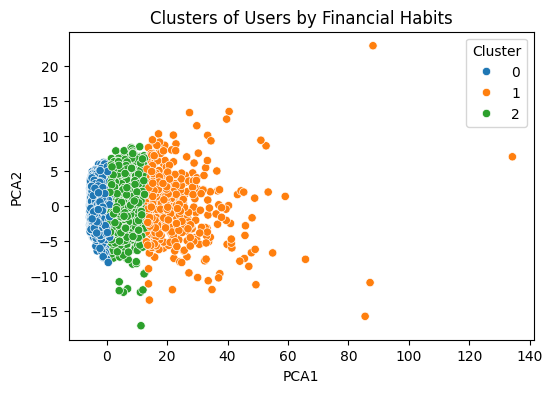

          Income  Total_Expenses  Savings_Rate  Disposable_Utilization  \
0   44637.249636    33371.621929      0.252382                     1.0   
1   26858.596592    17181.777859      0.360288                     1.0   
2   50367.605084    36476.154459      0.275801                     1.0   
3  101455.600247    69837.646632      0.311643                     1.0   
4   24875.283548    18609.583016      0.251885                     1.0   
5   24875.610267    17276.344968      0.305491                     1.0   
6  106119.692762    64524.367039      0.391966                     1.0   
7   55431.341508    46965.396911      0.152728                     1.0   
8   20606.733121    20243.815248      0.017612                     1.0   
9   46304.790235    30614.533959      0.338847                     1.0   

   Overspending_Alert                                             Nudges  
0               False  [⚠️ You’re close to overspending your weekly b...  
1               False  [⚠️ You’re c

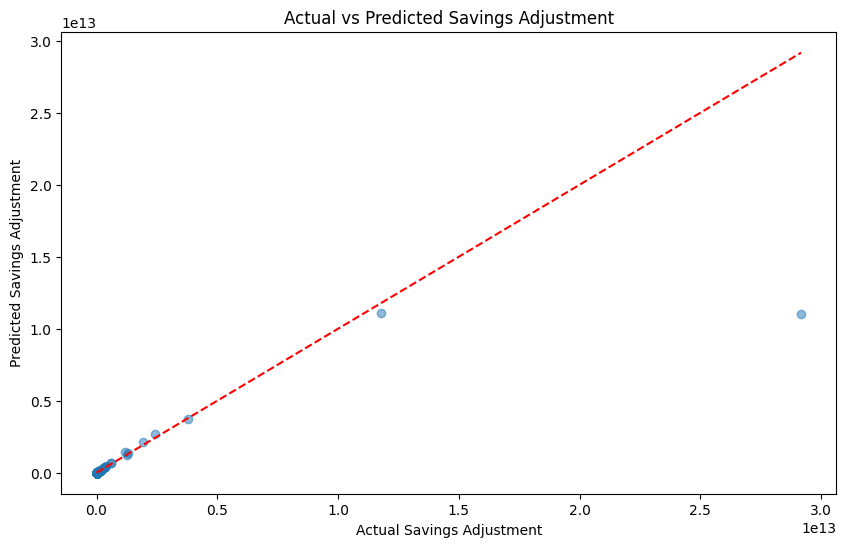

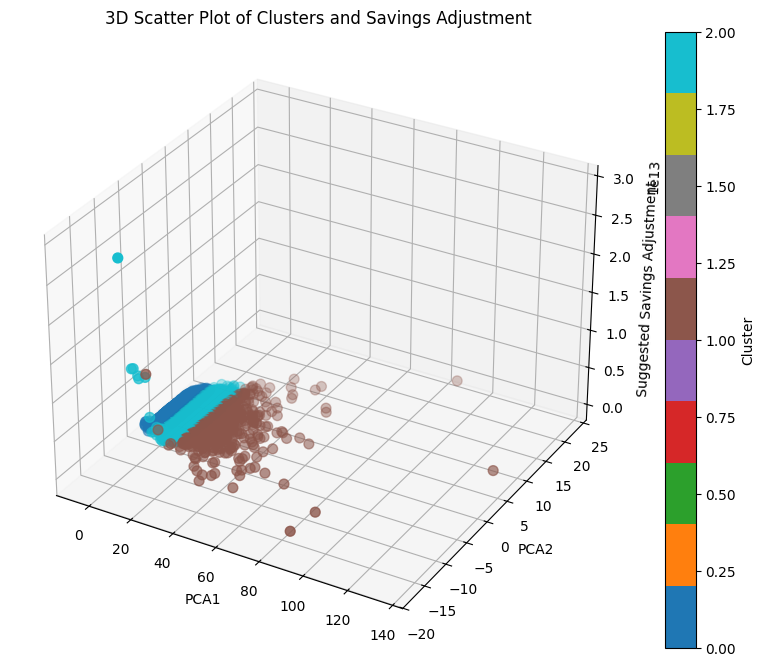

/var/folders/8j/5mcl_1pj4496sjc1njhzfrn80000gp/T/ipykernel_37944/4176006552.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nudge_counts.index, y=nudge_counts.values, palette='viridis')


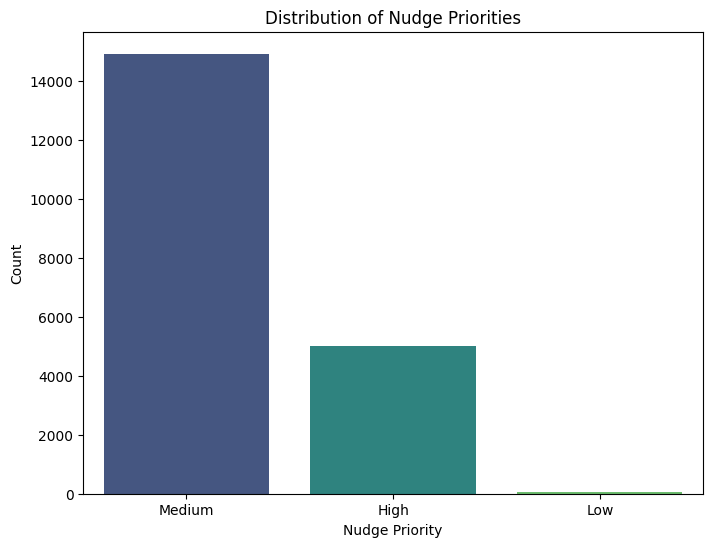

In [ ]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Occupation', 'City_Tier'], drop_first=True)

# Check for non-numeric columns
non_numeric_cols = df_encoded.select_dtypes(exclude=[np.number]).columns
if non_numeric_cols.any():
    print("Non-numeric columns found:", non_numeric_cols)
    df_encoded = df_encoded.drop(columns=non_numeric_cols)

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded.drop(columns=['Suggested_Savings_Adjustment']))

# Elbow Method to find optimal k
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    sse.append(km.inertia_)

# Plot elbow
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Fit KMeans with optimal k (update after checking the elbow plot)
optimal_k = 3  # Change based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaler.transform(df_encoded.drop(columns=['Suggested_Savings_Adjustment'])))

# Cluster summary (only on numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns
cluster_summary = df.groupby('Cluster')[numeric_cols].mean().round(2)
print("Cluster Financial Profiles:\n", cluster_summary)

# Visualize clusters with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('Clusters of Users by Financial Habits')
plt.show()

# Generate Actionable Nudges
df['Overspending_Alert'] = df['Overspending_Alert'].astype(bool)

def generate_nudges(row):
    nudges = []
    # Close to overspending
    if 0.8 < row['Disposable_Utilization'] <= 1.0:
        nudges.append("⚠️ You’re close to overspending your weekly budget.")
    # Already overspending
    if row['Overspending_Alert']:
        nudges.append("❌ You’ve overspent this week. Consider reducing non-essentials.")
    # Not meeting savings goals
    if row['Savings_vs_Desired'] < -0.05:
        nudges.append("💰 You’re below your savings target. Try to reduce spending.")
    # High discretionary spending
    if row['Discretionary_to_Income'] > 0.3:
        nudges.append("🛍️ Discretionary spending is quite high this week.")
    # High rent or loan ratio
    if row['Rent_to_Income'] > 0.4:
        nudges.append("🏠 Rent is consuming a large chunk of your income.")
    if row['Loan_to_Income'] > 0.3:
        nudges.append("📉 Loan payments are high relative to your income.")
    return nudges

df['Nudges'] = df.apply(generate_nudges, axis=1)

# Show sample users and their nudges
print(df[['Income', 'Total_Expenses', 'Savings_Rate', 'Disposable_Utilization', 'Overspending_Alert', 'Nudges']].head(10))

# Classify Nudge Priority
def classify_nudge_priority(nudges):
    if any("❌" in n for n in nudges):
        return "High"
    elif any("⚠️" in n for n in nudges):
        return "Medium"
    elif nudges:
        return "Low"
    return "None"

df['Nudge_Priority'] = df['Nudges'].apply(classify_nudge_priority)

# Train Savings Adjustment Model
target_col = 'Suggested_Savings_Adjustment'
df_encoded[target_col] = df[target_col] / 1e6

X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model (Basic RandomForest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate Performance
y_pred = model.predict(X_test)

# Rescale back
y_test_rescaled = y_test * 1e6
y_pred_rescaled = y_pred * 1e6

print("MAE:", mean_absolute_error(y_test_rescaled, y_pred_rescaled))
print("R² Score:", r2_score(y_test_rescaled, y_pred_rescaled))

# Visualize Savings Adjustment Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rescaled, y_pred_rescaled, alpha=0.5)
plt.plot([min(y_test_rescaled), max(y_test_rescaled)], [min(y_test_rescaled), max(y_test_rescaled)], color='red', linestyle='--')
plt.xlabel('Actual Savings Adjustment')
plt.ylabel('Predicted Savings Adjustment')
plt.title('Actual vs Predicted Savings Adjustment')
plt.show()

# Integrated Visualization using Matplotlib and Seaborn

# 3D Scatter Plot for Clusters and Savings Adjustment
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['PCA1'], df['PCA2'], df['Suggested_Savings_Adjustment'], c=df['Cluster'], cmap='tab10', s=50)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('Suggested Savings Adjustment')
ax.set_title('3D Scatter Plot of Clusters and Savings Adjustment')
plt.colorbar(sc, label='Cluster')
plt.show()

# Bar Chart for Nudge Priorities
nudge_counts = df['Nudge_Priority'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=nudge_counts.index, y=nudge_counts.values, palette='viridis')
plt.title('Distribution of Nudge Priorities')
plt.xlabel('Nudge Priority')
plt.ylabel('Count')
plt.show()
